# Домашнее задание №2

## Задача 1

1. Получите явные формулы для вычисления $\alpha_k$, $\beta_k$ в методе сопряженных градиентов для сильно выпуклой квадратичной функции.
$$f(x) = \frac{1}{2} x^TAx + b^Tx + с$$
$$A=A^T\succ0$$


$$\alpha_k = \arg\min\left(f(x_k + \alpha_k p_k)\right)$$

$$\alpha_k = -\frac{\nabla^{\top}f(x_{k}) p_k}{p_k^\top A p_k}$$

$$
\beta_k = \dfrac{\nabla^{\top}f(x_{k+1})Ap_k}{p^{\top}_{k}Ap_{k}}
$$


## Задача 2

1. Реализуйте метод Нестерова, метод сопряженных градиентов и сравните с ранее реализованным градиентным спуском.

2. Задайте три квадратичные функции $(n = 2,\ 10,\ 1000)$ с разными числами обусловленности $(𝟆 = 1,\ 100,\ 10000)$. Всего у вас получается 9 разных матриц A. Запустите на них методы следующим образом:
- рассмотрите разные начальные точки(не менее 2ух);
- рассмотрите разную точность для остановки(не менее 3ех);
- для метода Нестерова рассмотрите разные начальные условия, а именно в одном случае $x_0=y_0=0_n$, в другом $x_0=0_n,y_0=1_n$.


Постарайтесь ответить на вопрос: как зависит поведение методов от числа обусловленности и от начальной точки?

**Замечание 1. Критерий остановки** В этом задании используйте следующий критерий остановки:
$$\frac{\left\|∇f(x_k)\right\|_2^2}{\left\|∇f(x_0)\right\|_2^2} \le ɛ$$

Этот критерий задает относительную точность решения благодаря нормировке на $\left\|∇f(x_0)\right\|_2^2$.

**Замечание 2. Квадратичная функция** Рассмотрим матрицу $A \in \mathbf{S}^n_{++}$ и вектор $b \in \mathbf{R}^n$ и зададим функцию
$$f(x) = \frac{1}{2} x^TAx + b^Tx$$.

Её число обусловленности зависит от матрицы $A$ и равняется $𝟆 = \frac{\lambda_{max}}{\lambda_{min}} = \frac{L}{μ}$, где 𝐿 – константа Липшица градиента, а 𝜇 - константа сильной выпуклости. В задании вам необходимо исследовать поведение метода в зависимости от числа обусловленности.

Сгенерировать случайную квадратичную задачу с заданным $𝟆$ можно, например, так: взять случайные числа $\lambda_1, \lambda_2, \dots \lambda_n \in [1, 𝟆]$, так что $min_i\lambda_i = 1$, а $max_i\lambda_i = 𝟆$, и положить $A = diag(\lambda_1, \dots \lambda_n)$. Элементы вектора $b$ можно взять произвольными, они на обусловленность не влияют.

In [ ]:
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
def Nesterov(x0, y0, f, gradf, alpha, tol=1e-3, max_iter=10000):
    history = [(x0, time.time())]
    x = x0.copy()
    gradf0 = np.linalg.norm(gradf(x0))
    k = 0
    x_prev = x0.copy()
    y = y0.copy()
    while k == 0 or (np.linalg.norm(gradf(x)) ** 2 / gradf0 ** 2) > tol: 
        x_prev, x = x, y - alpha * gradf(y)
        y = x + k/(k+3) * (x - x_prev)
        history.append((x, time.time()))
        if k >= max_iter:
            break
        k += 1
    return x, history

In [ ]:
def ConjugateGradientQuadratic(x0, f, gradf, A, b, tol=1e-3, max_iter=10000):
    history = [(x0, time.time())]
    x = x0.copy()    
    gradf0 = np.linalg.norm(gradf(x0))
    k = 0
    r = gradf(x)
    p = -r
    while k == 0 or (np.linalg.norm(gradf(x)) ** 2 / gradf0 ** 2) > tol: 
        alpha = r.dot(r) / p.dot(A.dot(p))
        x = x + alpha * p
        r_next = r + alpha * A.dot(p)
        beta = r_next.dot(r_next) / r.dot(r)
        p = -r_next + beta * p
        r = r_next
        history.append((x, time.time()))
        if k >= max_iter:
            break
        k += 1
    return x, history

In [ ]:
def ArmijoStep(x, h, gradf, f, beta, rho, alpha0):
  fx = f(x)
  hg = h.dot(gradf(x))
  alpha = alpha0
  while f(x + alpha * h) > fx + beta * alpha * hg:
    alpha *= rho
  return alpha

In [ ]:
def GradientDescentArmijo(x0, f, gradf, tol=1e-3, max_iter=10000, beta=0.3, rho=0.1, alpha0=1):
  history = [(x0, time.time())]
  x = x0.copy()
  gradf0 = np.linalg.norm(gradf(x0))
  k = 0
  x_prev = None
  while x_prev is None or (np.linalg.norm(gradf(x)) ** 2 / gradf0 ** 2) > tol: 
    h = -gradf(x)
    alpha = ArmijoStep(x, h, gradf, f, beta, rho, alpha0)
    x_prev, x = x, x + alpha * h
    history.append((x, time.time()))
    if k >= max_iter:
      break
    k += 1
  return x, history

In [ ]:
def parse_logs(xhistory, ret_time=False, funcx=None):
    values = [funcx(x) for x, _ in xhistory]
    if ret_time:
        times = [t for _, t in xhistory]
        times = [times[ind]-times[0] for ind, t in enumerate(times)]
    else:
        times = [i for i in range(len(xhistory))]
    return times, values

## Метод Нестерова

Построим для каждого $n$ график с зависимостями относительной нормы градиента от времени работы и от номера итерации для разных чисел обусловленности. Начальную точку возьмем $x_0 = 0(y_0=0)$

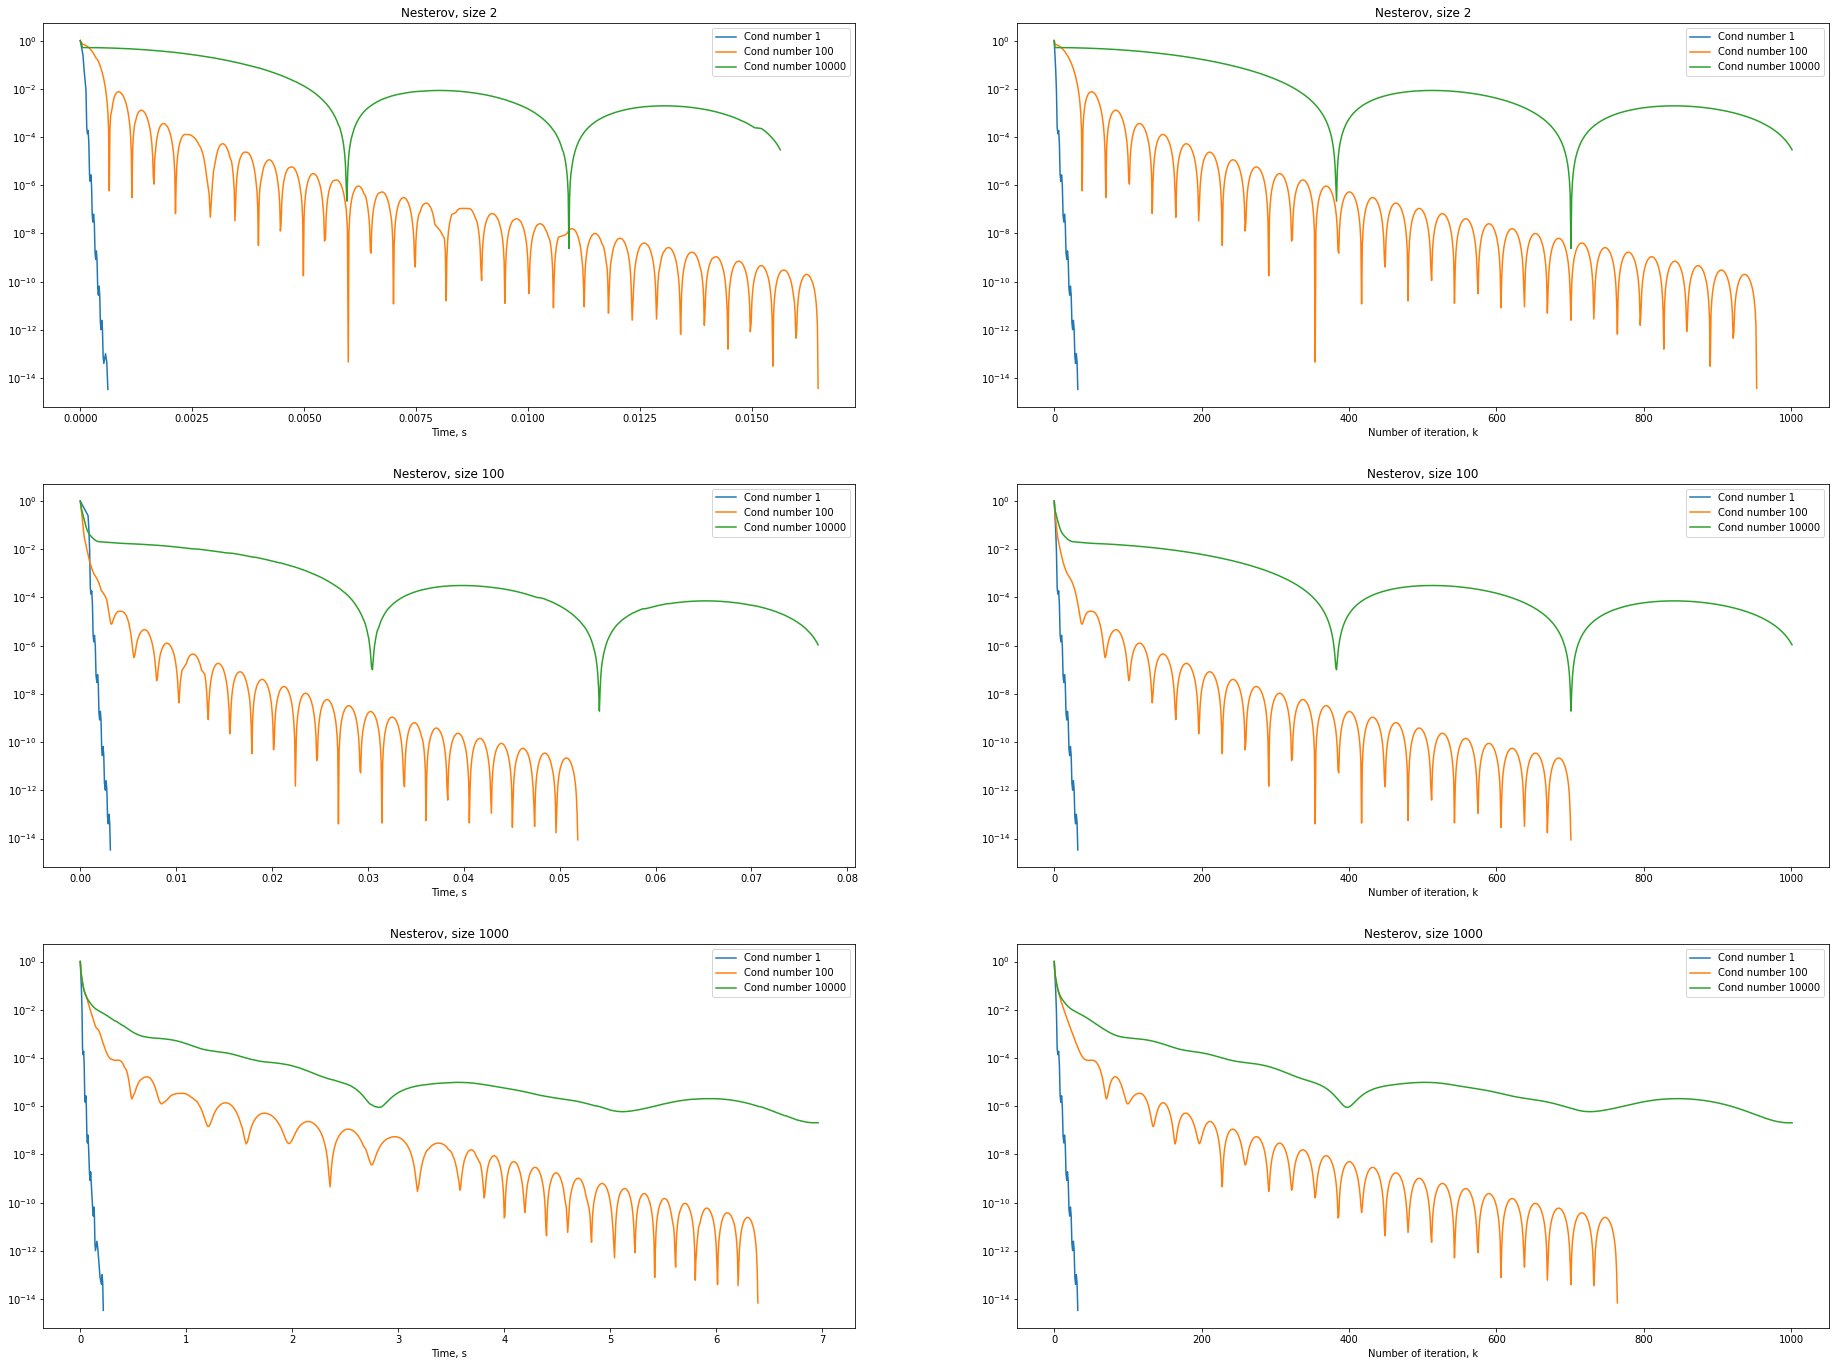

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(32, 24))
n_sizes = [2, 100, 1000]
histories = {}
A_list = {}
b_list = {}

for i, axis in enumerate(axes.flat):
  n = n_sizes[int(i / 2)]
  ret_time = (i % 2 == 0)
  axis.set_title(f"Nesterov, size {n}")
  axis.set_xlabel("Time, s" if ret_time else "Number of iteration, k")
  for k in [1, 100, 10000]:
    if ret_time:
      lambdas = np.random.default_rng().integers(low=1, high=k+1, size=n)
      lambdas[0] = 1
      lambdas[-1] = k
      A = np.diag(lambdas)
      b = np.random.randn(n)
      x0 = np.zeros(n)

      f = lambda x: 1/2 * x.T @ A @ x + b.T @ x
      gradf = lambda x: A @ x + b

      x_min, xhistory = Nesterov(x0, x0, f, gradf, alpha=1/(1+k), tol=1e-14, max_iter=1000)
      histories[k] = xhistory
      A_list[k] = A
      b_list[k] = b
    else:
      xhistory = histories[k]
      A = A_list[k]
      b = b_list[k]
      f = lambda x: 1/2 * x.T @ A @ x + b.T @ x
      gradf = lambda x: A @ x + b
    funcx = lambda x: (np.linalg.norm(gradf(x)) ** 2) / (np.linalg.norm(gradf(np.zeros(n))) ** 2)
    times, values = parse_logs(xhistory, ret_time=ret_time, funcx=funcx)
    axis.semilogy(times, values, label=f"Cond number {k}")
  axis.legend()


$x_0 = 0, y_0 = 1$

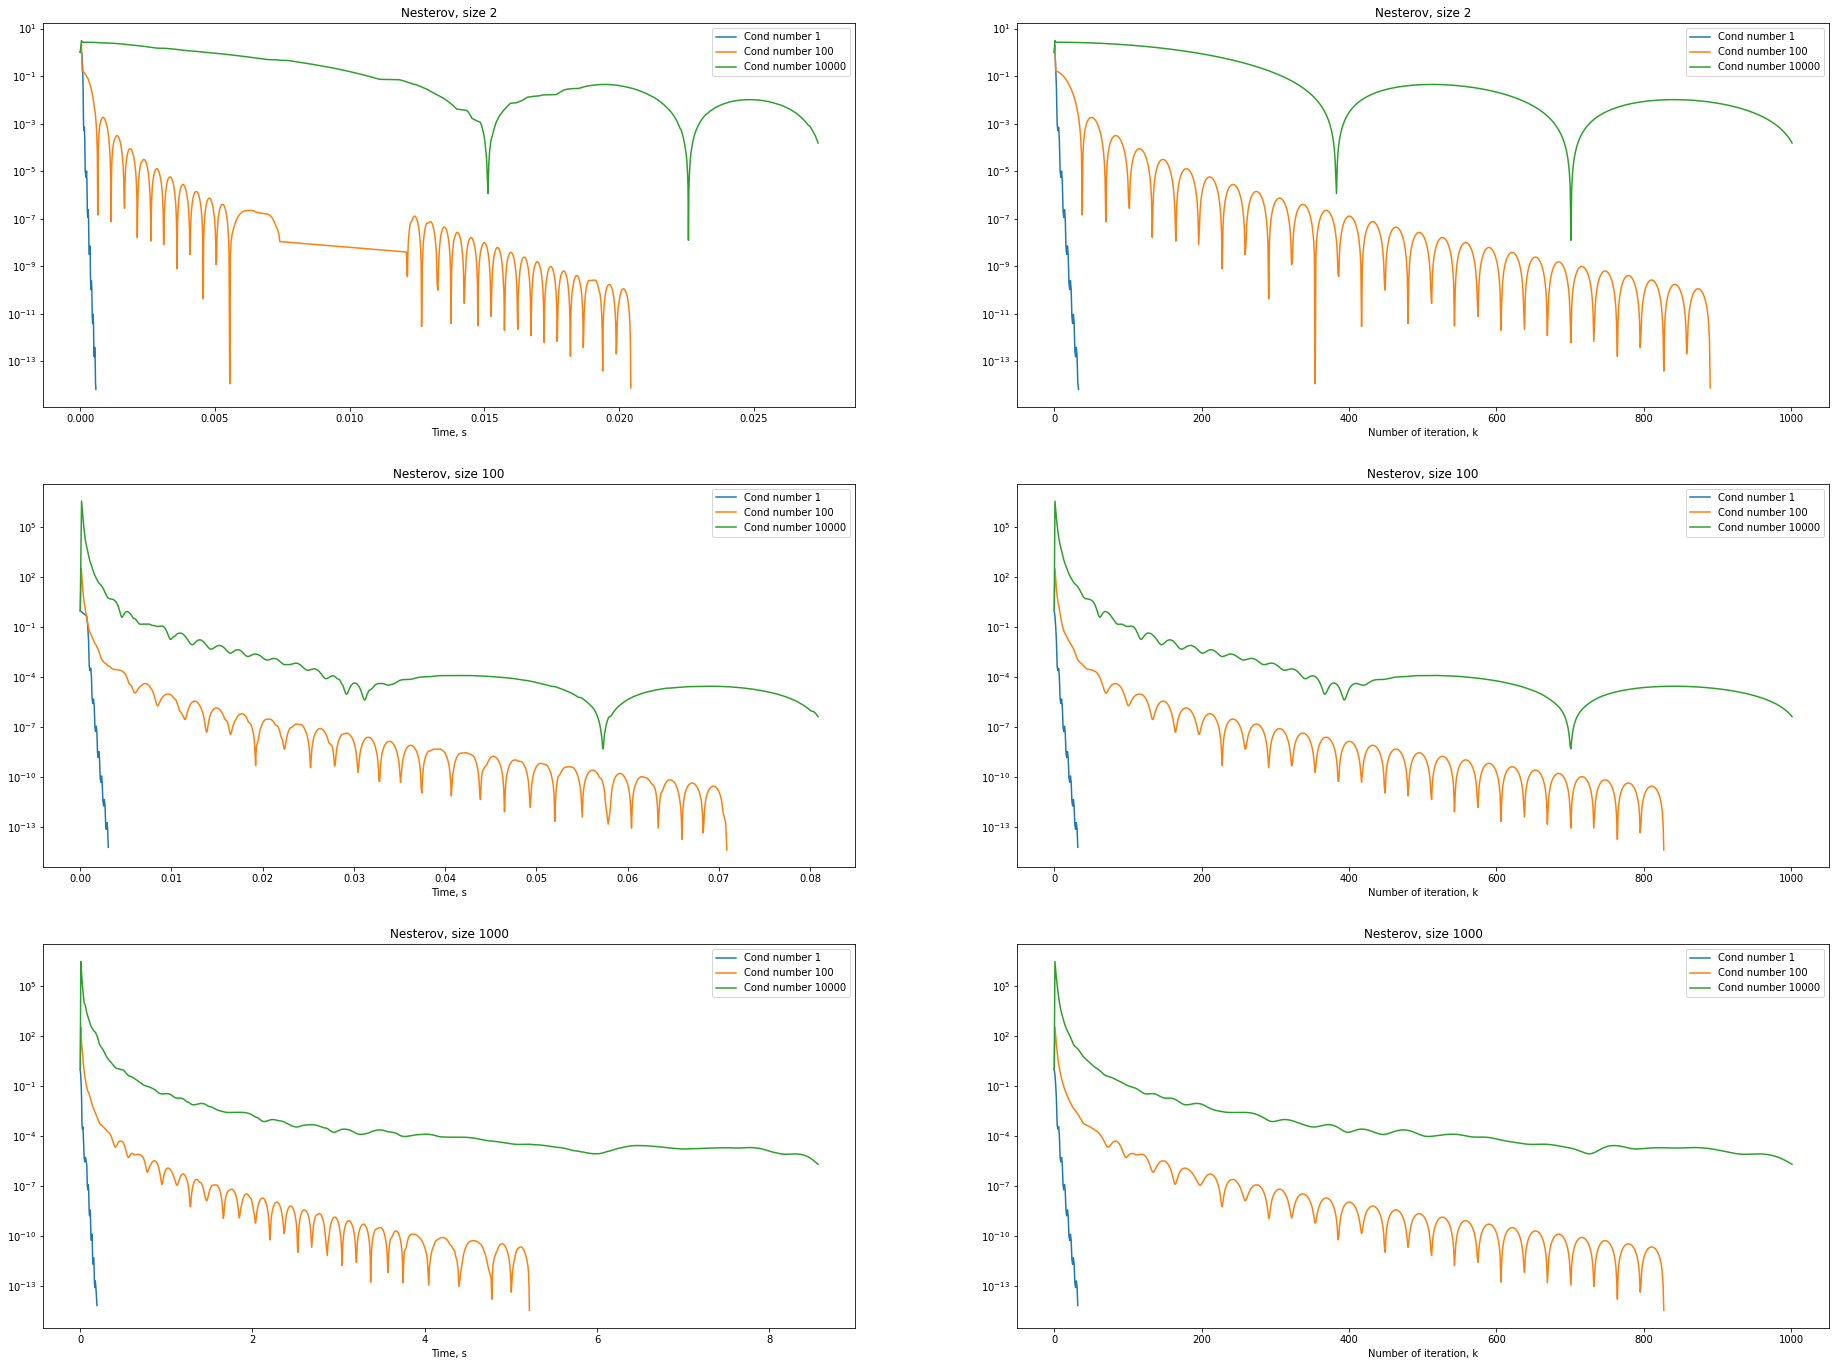

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(32, 24))
n_sizes = [2, 100, 1000]
histories = {}
A_list = {}
b_list = {}

for i, axis in enumerate(axes.flat):
  n = n_sizes[int(i / 2)]
  ret_time = (i % 2 == 0)
  axis.set_title(f"Nesterov, size {n}")
  axis.set_xlabel("Time, s" if ret_time else "Number of iteration, k")
  for k in [1, 100, 10000]:
    if ret_time:
      lambdas = np.random.default_rng().integers(low=1, high=k+1, size=n)
      lambdas[0] = 1
      lambdas[-1] = k
      A = np.diag(lambdas)
      b = np.random.randn(n)
      x0 = np.zeros(n)
      y0 = np.zeros(n) + 1

      f = lambda x: 1/2 * x.T @ A @ x + b.T @ x
      gradf = lambda x: A @ x + b

      x_min, xhistory = Nesterov(x0, y0, f, gradf, alpha=1/(1+k), tol=1e-14, max_iter=1000)
      histories[k] = xhistory
      A_list[k] = A
      b_list[k] = b
    else:
      xhistory = histories[k]
      A = A_list[k]
      b = b_list[k]
      f = lambda x: 1/2 * x.T @ A @ x + b.T @ x
      gradf = lambda x: A @ x + b
    funcx = lambda x: (np.linalg.norm(gradf(x)) ** 2) / (np.linalg.norm(gradf(np.zeros(n))) ** 2)
    times, values = parse_logs(xhistory, ret_time=ret_time, funcx=funcx)
    axis.semilogy(times, values, label=f"Cond number {k}")
  axis.legend()


## Метод сопряженных градиентов

Построим для каждого $n$ график с зависимостями относительной нормы градиента от времени работы и от номера итерации для разных чисел обусловленности. Начальную точку возьмем $x_0 = 0$

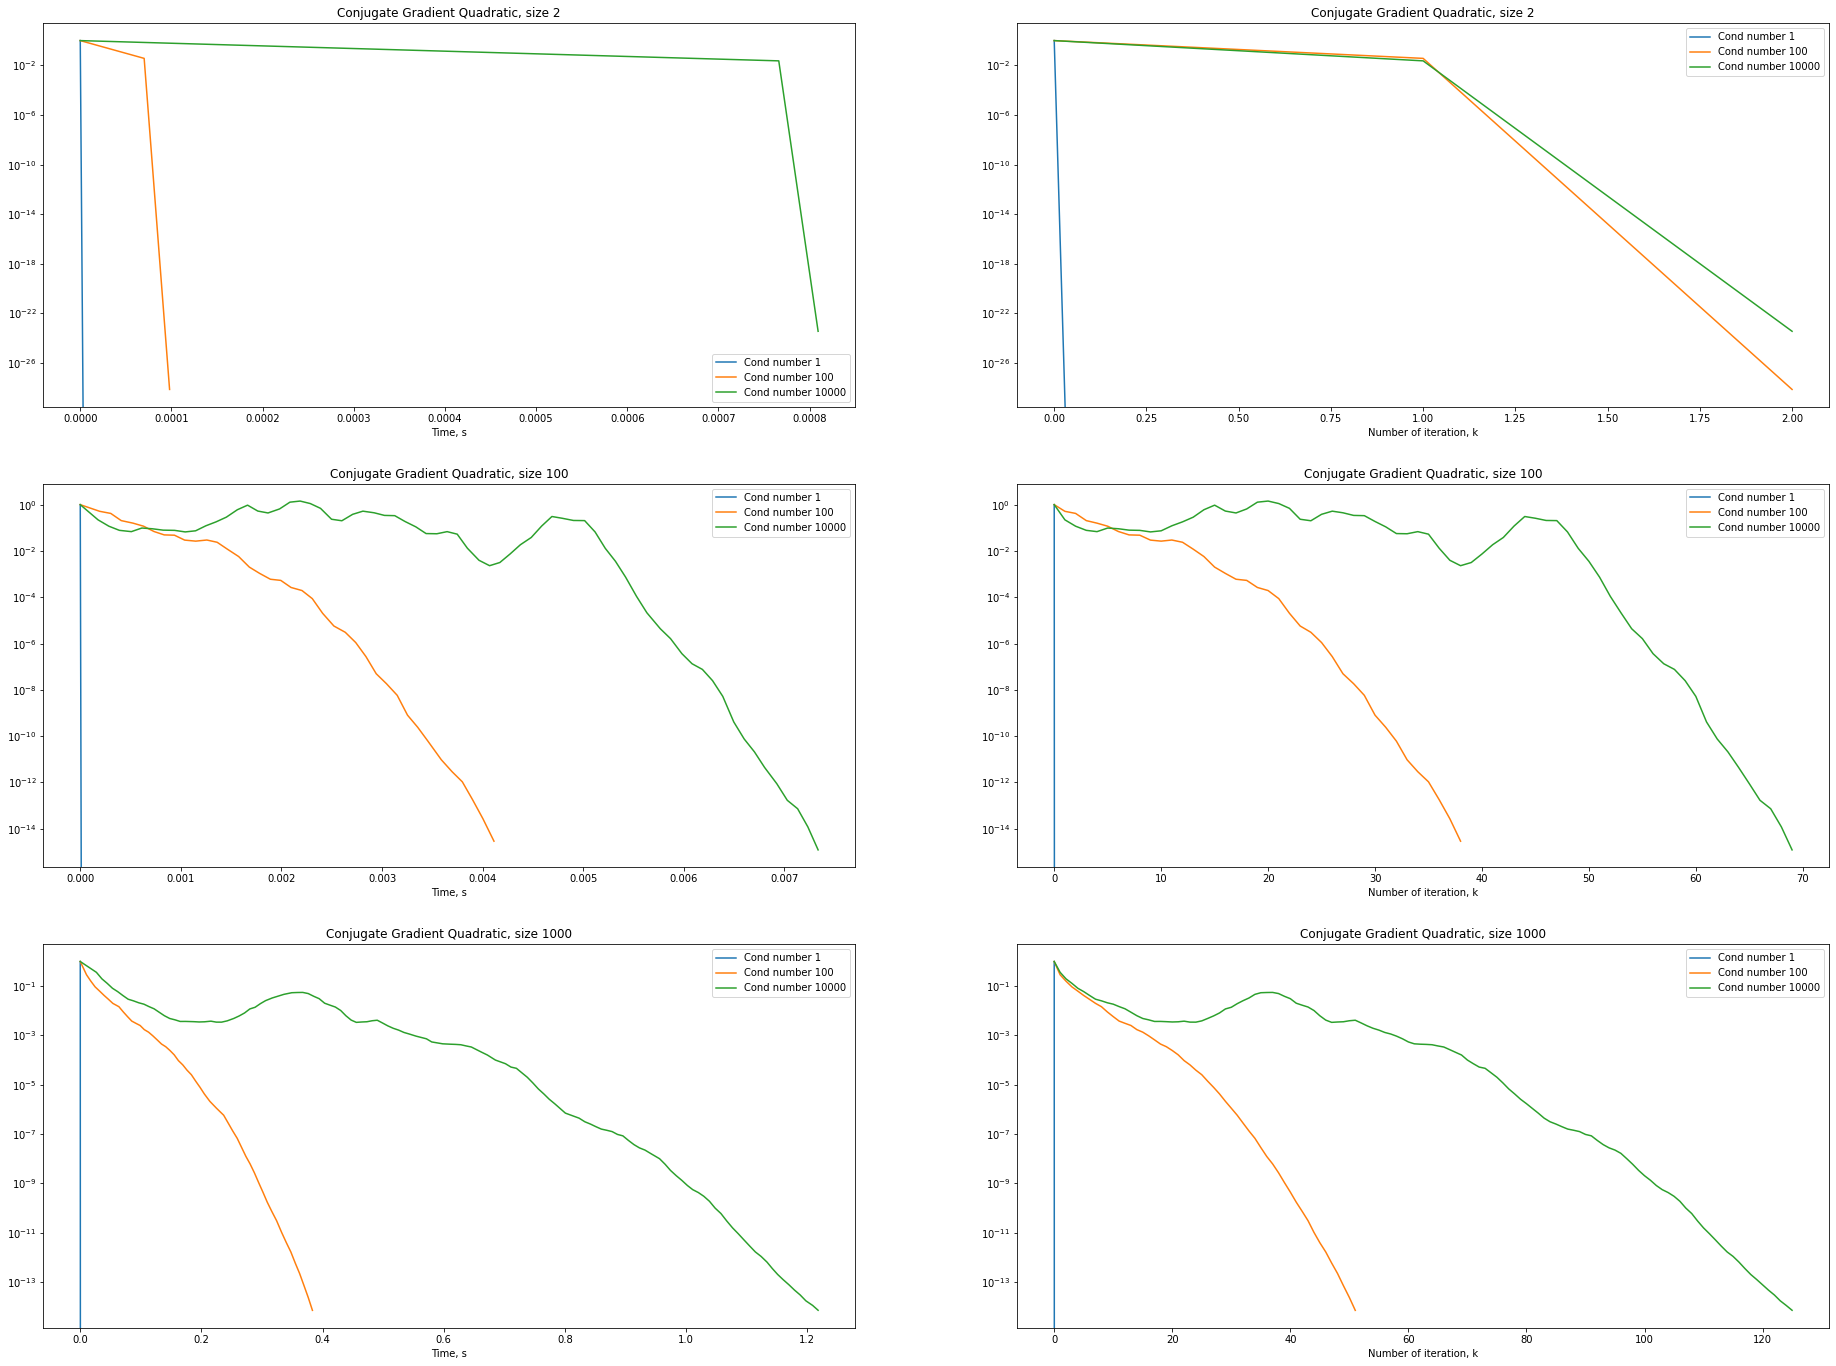

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(32, 24))
n_sizes = [2, 100, 1000]
histories = {}
A_list = {}
b_list = {}

for i, axis in enumerate(axes.flat):
  n = n_sizes[int(i / 2)]
  ret_time = (i % 2 == 0)
  axis.set_title(f"Conjugate Gradient Quadratic, size {n}")
  axis.set_xlabel("Time, s" if ret_time else "Number of iteration, k")
  for k in [1, 100, 10000]:
    if ret_time:
      lambdas = np.random.default_rng().integers(low=1, high=k+1, size=n)
      lambdas[0] = 1
      lambdas[-1] = k
      A = np.diag(lambdas)
      b = np.random.randn(n)
      x0 = np.zeros(n)

      f = lambda x: 1/2 * x.T @ A @ x + b.T @ x
      gradf = lambda x: A @ x + b

      x_min, xhistory = ConjugateGradientQuadratic(x0, f, gradf, A, b, tol=1e-14, max_iter=1000)
      histories[k] = xhistory
      A_list[k] = A
      b_list[k] = b
    else:
      xhistory = histories[k]
      A = A_list[k]
      b = b_list[k]
      f = lambda x: 1/2 * x.T @ A @ x + b.T @ x
      gradf = lambda x: A @ x + b
    funcx = lambda x: (np.linalg.norm(gradf(x)) ** 2) / (np.linalg.norm(gradf(np.zeros(n))) ** 2)
    times, values = parse_logs(xhistory, ret_time=ret_time, funcx=funcx)
    axis.semilogy(times, values, label=f"Cond number {k}")
  axis.legend()

Возьмем начальную точку $x_0 ≃ -A^{-1}b$

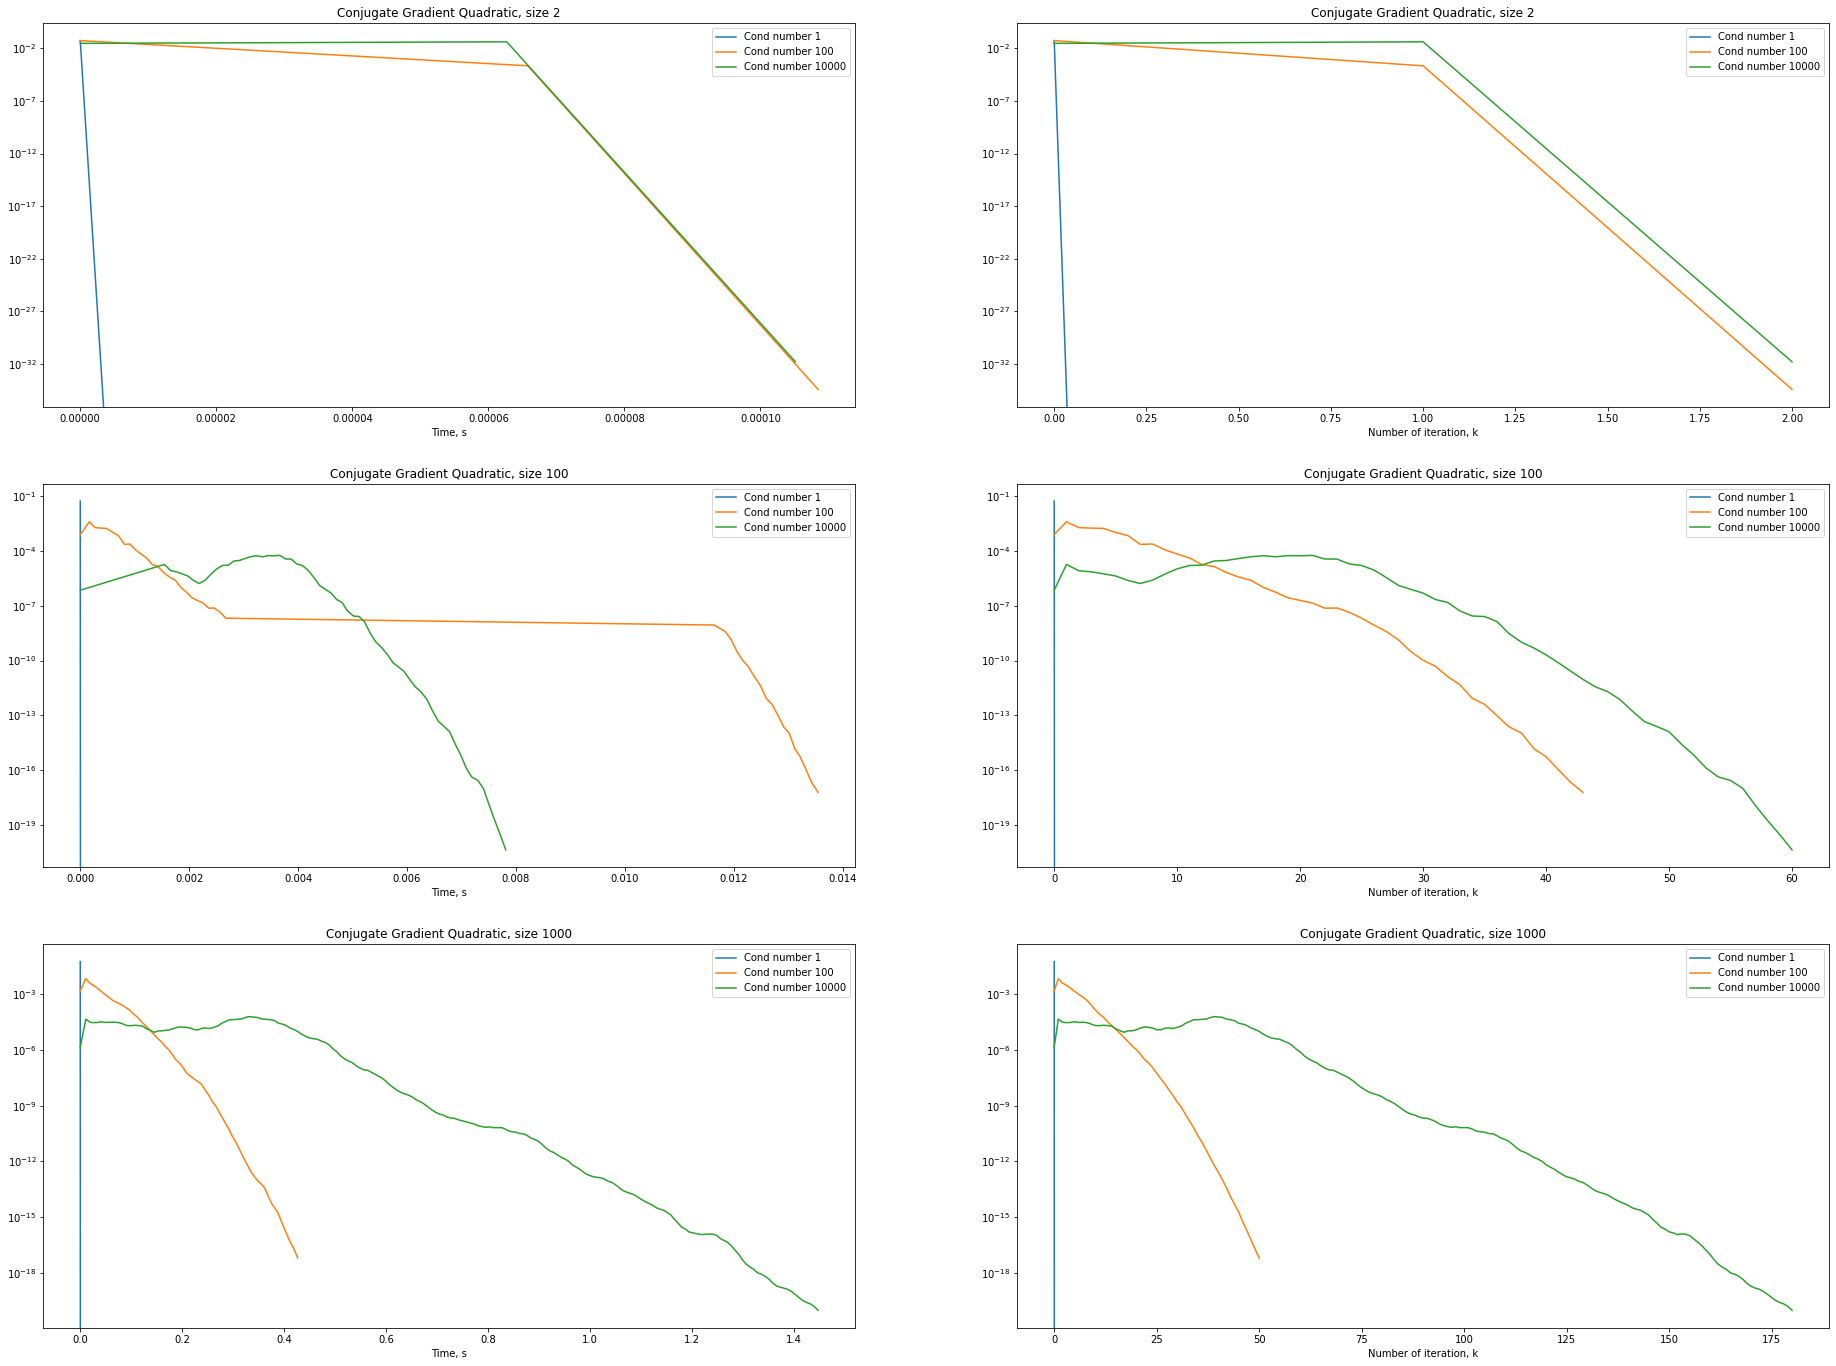

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(32, 24))
n_sizes = [2, 100, 1000]
histories = {}
A_list = {}
b_list = {}

for i, axis in enumerate(axes.flat):
  n = n_sizes[int(i / 2)]
  ret_time = (i % 2 == 0)
  axis.set_title(f"Conjugate Gradient Quadratic, size {n}")
  axis.set_xlabel("Time, s" if ret_time else "Number of iteration, k")
  for k in [1, 100, 10000]:
    if ret_time:
      lambdas = np.random.default_rng().integers(low=1, high=k+1, size=n)
      lambdas[0] = 1
      lambdas[-1] = k
      A = np.diag(lambdas)
      b = np.random.randn(n)
      x0 = - np.linalg.inv(A + 0.3 * np.eye(n)) @ b

      f = lambda x: 1/2 * x.T @ A @ x + b.T @ x
      gradf = lambda x: A @ x + b

      x_min, xhistory = ConjugateGradientQuadratic(x0, f, gradf, A, b, tol=1e-14, max_iter=1000)
      histories[k] = xhistory
      A_list[k] = A
      b_list[k] = b
    else:
      xhistory = histories[k]
      A = A_list[k]
      b = b_list[k]
      f = lambda x: 1/2 * x.T @ A @ x + b.T @ x
      gradf = lambda x: A @ x + b
    funcx = lambda x: (np.linalg.norm(gradf(x)) ** 2) / (np.linalg.norm(gradf(np.zeros(n))) ** 2)
    times, values = parse_logs(xhistory, ret_time=ret_time, funcx=funcx)
    axis.semilogy(times, values, label=f"Cond number {k}")
  axis.legend()